In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [50]:
# Import data
data = pd.read_csv('data/data_train_diabetes_health_indicators.csv')
data = data.drop('Unnamed: 0', axis=1)
data['Diabetes_012'] = data['Diabetes_012'].astype(int)

# Afficher les premières lignes du jeu de données
print("Les premières lignes du jeu de données :")
print(data.head())

# Afficher les informations sur le jeu de données
print("\nInformations sur le jeu de données :")
print(data.info())

# Afficher le nombre de données (nombre de lignes et de colonnes)
print("\nNombre de lignes et de colonnes dans le jeu de données :")
print(data.shape)

# Vérifier la présence de valeurs manquantes
print("\nValeurs manquantes dans le jeu de données :")
print(data.isnull().sum())

# Afficher des statistiques descriptives sur le jeu de données
print("\nStatistiques descriptives :")
print(data.describe())

Les premières lignes du jeu de données :
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0             2       1       1.0          1  32.0     1.0     0.0   
1             0       0       1.0          1  28.0     0.0     0.0   
2             0       0       1.0          1  24.0     1.0     0.0   
3             2       1       1.0          1  38.0     0.0     0.0   
4             0       0       1.0          1  30.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   1.0             1       1  ...              1   
1                   0.0             0       0  ...              1   
2                   0.0             1       0  ...              1   
3                   0.0             1       0  ...              1   
4                   0.0             0       0  ...              0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0          0.0      2.0      15.0       0.0  

In [51]:
class_counts = data['Diabetes_012'].value_counts()
print(class_counts)

Diabetes_012
0    39508
2     6689
1     1079
Name: count, dtype: int64


In [52]:
class_frequencies = data['Diabetes_012'].value_counts(normalize=True)
print(class_frequencies)

Diabetes_012
0    0.835688
2    0.141488
1    0.022823
Name: proportion, dtype: float64


In [53]:
# Proportions des classes (déséquilibre)
class_counts = data['Diabetes_012'].value_counts()
print("Proportions des classes :\n", class_counts)

Proportions des classes :
 Diabetes_012
0    39508
2     6689
1     1079
Name: count, dtype: int64


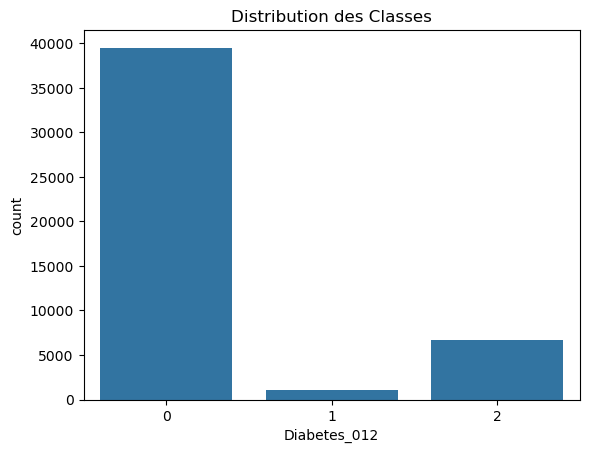

In [54]:
# Visualisation de la distribution des classes
sns.countplot(x='Diabetes_012', data=data)
plt.title('Distribution des Classes')
plt.show()

In [55]:
# Séparer les caractéristiques (X) de la variable cible (y)
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Utiliser RandomOverSampler pour suréchantillonner la classe minoritaire
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Utiliser RandomUnderSampler pour sous-échantillonner la classe majoritaire
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Les données maintenant équilibrées
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

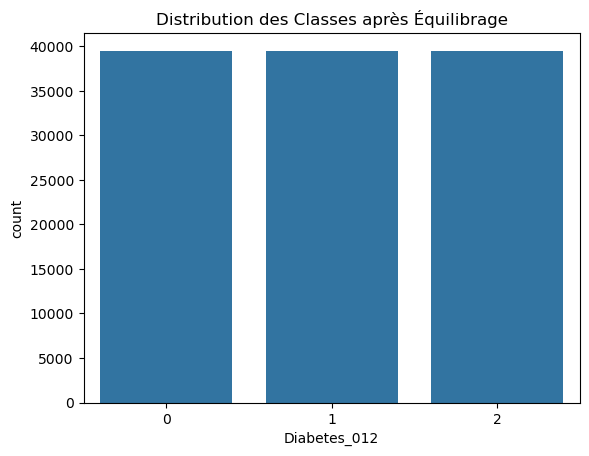

In [56]:
# Visualisation de la distribution des classes après équilibrage
sns.countplot(x='Diabetes_012', data=balanced_data)
plt.title('Distribution des Classes après Équilibrage')
plt.show()

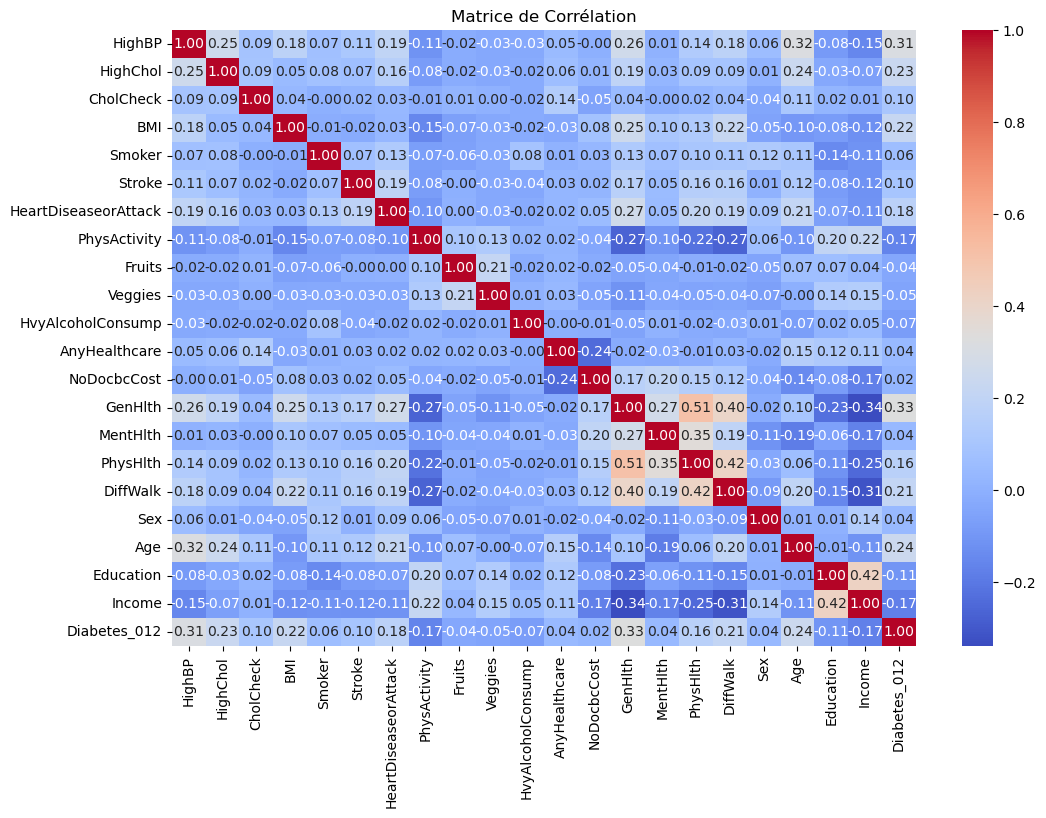

In [57]:
# Corrélations entre les features
correlation_matrix = balanced_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

In [58]:
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Entraîner un modèle de forêt aléatoire
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Obtenir l'importance des caractéristiques
importance = clf.feature_importances_
print(importance)

[0.0422727  0.02773889 0.00333033 0.17389395 0.03353816 0.0124692
 0.01956631 0.02377195 0.03372448 0.02517681 0.00971382 0.00572628
 0.01223118 0.06954604 0.06639254 0.07491853 0.02406627 0.0322374
 0.12622674 0.06717701 0.1162814 ]


In [60]:
X = balanced_data.drop(columns=['Diabetes_012'])
y = balanced_data['Diabetes_012']

# Split data into train anddata test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Créer et entraîner un modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Précision du modèle : {accuracy:.2f}")
print("Matrice de confusion :\n", conf_matrix)
print("Rapport de classification :\n", class_report)

Précision du modèle : 0.97
Matrice de confusion :
 [[7275   18  705]
 [   0 7978    0]
 [  57    3 7669]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      7998
           1       1.00      1.00      1.00      7978
           2       0.92      0.99      0.95      7729

    accuracy                           0.97     23705
   macro avg       0.97      0.97      0.97     23705
weighted avg       0.97      0.97      0.97     23705



In [66]:
data_vald = pd.read_csv('data/date_validation_diabetes_health_indicators.csv')

In [67]:
# Séparer les caractéristiques (X) de la variable cible (y)
X = data_vald.drop(columns=['Diabetes_012'])
y = data_vald['Diabetes_012']
X = X.drop('Unnamed: 0', axis=1)
y_pred = rf_model.predict(X)

# Évaluer les performances du modèle
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

In [68]:
print(f"Précision du modèle : {accuracy:.2f}")
#print("Matrice de confusion :\n", conf_matrix)
#print("Rapport de classification :\n", class_report)

Précision du modèle : 0.98


In [69]:
params = rf_model.get_params()
print("Paramètres du modèle Random Forest :")
for param, value in params.items():
    print(f"{param}: {value}")

Paramètres du modèle Random Forest :
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [76]:
import pickle
# Enregistrez le modèle dans un fichier avec pickle
with open('classification_modele_random_forest.pkl', 'wb') as fichier:
    pickle.dump(rf_model, fichier)